In [1]:
import numpy as np
import os
from xml.etree import ElementTree
from utils import *
from get_data_from_XML import *
from getUID import *
from get_gt import *
from roi2rect import *

In [2]:
import pandas as pd
metadata=pd.read_csv("../data/manifest-1608669183333/metadata.csv")
metadata=metadata[metadata["Subject ID"].str.contains("G")]
metadata=metadata[metadata.Modality=="CT"]
metadata

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1032,1.3.6.1.4.1.14519.5.2.1.6655.2359.481038456248...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0001,1.3.6.1.4.1.14519.5.2.1.6655.2359.269197582919...,Chest,03-11-2007,10mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,23,12.15 MB,./Lung-PET-CT-Dx/Lung_Dx-G0001/03-11-2007-NA-C...,2023-04-02T21:45:40.968
1033,1.3.6.1.4.1.14519.5.2.1.6655.2359.228104424729...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0002,1.3.6.1.4.1.14519.5.2.1.6655.2359.171919653996...,Chest,09-05-2004,5mm,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.89 MB,./Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-NA-C...,2023-04-02T21:45:47.117
1034,1.3.6.1.4.1.14519.5.2.1.6655.2359.274175502344...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0002,1.3.6.1.4.1.14519.5.2.1.6655.2359.171919653996...,Chest,09-05-2004,5mm,Philips,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.89 MB,./Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-NA-C...,2023-04-02T21:45:53.116
1035,1.3.6.1.4.1.14519.5.2.1.6655.2359.255626613690...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0003,1.3.6.1.4.1.14519.5.2.1.6655.2359.992631987710...,CHESTC,07-27-2006,5mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,51,26.96 MB,./Lung-PET-CT-Dx/Lung_Dx-G0003/07-27-2006-NA-C...,2023-04-02T21:46:04.991
1037,1.3.6.1.4.1.14519.5.2.1.6655.2359.949618962952...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0003,1.3.6.1.4.1.14519.5.2.1.6655.2359.992631987710...,CHESTC,07-27-2006,5mm,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,153,80.87 MB,./Lung-PET-CT-Dx/Lung_Dx-G0003/07-27-2006-NA-C...,2023-04-02T21:46:21.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.3.6.1.4.1.14519.5.2.1.6655.2359.112642828995...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0042,1.3.6.1.4.1.14519.5.2.1.6655.2359.145831440813...,PET03CBMWholebodyFirstHead Adult,10-15-2010,Range-CT WB 1.0 B30f-Tra-ALPHA Range,SIEMENS,CT,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,169,133.33 MB,./Lung-PET-CT-Dx/Lung_Dx-G0042/10-15-2010-NA-P...,2023-04-03T00:10:11.488
1288,1.3.6.1.4.1.14519.5.2.1.6655.2359.133987507545...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0045,1.3.6.1.4.1.14519.5.2.1.6655.2359.284757959801...,PET01PTheadlung Adult,05-08-2011,Thorax 1.0 B70f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,376,198.43 MB,./Lung-PET-CT-Dx/Lung_Dx-G0045/05-08-2011-NA-P...,2023-04-03T00:10:52.05
1289,1.3.6.1.4.1.14519.5.2.1.6655.2359.239458321728...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0046,1.3.6.1.4.1.14519.5.2.1.6655.2359.148329073455...,PET03CBMWholebodyFirstHead Adult,12-01-2010,Thorax 1.0 B70f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,429,226.41 MB,./Lung-PET-CT-Dx/Lung_Dx-G0046/12-01-2010-NA-P...,2023-04-03T00:11:40.824
1290,1.3.6.1.4.1.14519.5.2.1.6655.2359.115355634033...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0034,1.3.6.1.4.1.14519.5.2.1.6655.2359.309937123803...,PET03WholebodyFirstHead Adult,11-09-2009,Range-Thorax 1.0 B70f-Tra-ALPHA Range,SIEMENS,CT,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,255,201.18 MB,./Lung-PET-CT-Dx/Lung_Dx-G0034/11-09-2009-NA-P...,2023-04-03T00:12:14.624


<AxesSubplot:>

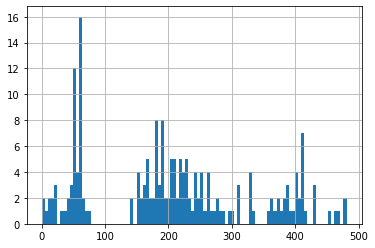

In [3]:
metadata["Number of Images"].hist(bins=100)

In [4]:
top_G=metadata["Subject ID"]
top_G=set([l[8:]for l in top_G])

In [5]:
metadata[metadata["Subject ID"]=="Lung_Dx-G0031"]

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1095,1.3.6.1.4.1.14519.5.2.1.6655.2359.269178008582...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0031,1.3.6.1.4.1.14519.5.2.1.6655.2359.375418541264...,lungc,10-22-2009,A phase 5mm Stnd SS50,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,180,95.16 MB,./Lung-PET-CT-Dx/Lung_Dx-G0031/10-22-2009-NA-l...,2023-04-02T21:57:21.274
1104,1.3.6.1.4.1.14519.5.2.1.6655.2359.265088720385...,Lung-PET-CT-Dx,NaN,https://doi.org/10.7937/TCIA.2020.NNC20461,Lung_Dx-G0031,1.3.6.1.4.1.14519.5.2.1.6655.2359.375418541264...,lungc,10-22-2009,5mm Lung SS50,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,60,31.72 MB,./Lung-PET-CT-Dx/Lung_Dx-G0031/10-22-2009-NA-l...,2023-04-02T21:59:18.934


In [6]:
#Transform rgb ctscan to grayscale using:(0.3 * R) + (0.59 * G) + (0.11 * B) 
def ct_to_gray(ctscan):
    r = ctscan[:,:,0]
    g = ctscan[:,:,1]
    b = ctscan[:,:,2]
    graybmp = np.multiply(0.3*r, 0.59*g)
    graybmp = np.multiply(graybmp, 0.11*b)
    return graybmp

In [7]:
###find files
dicom_path = "../data/manifest-1608669183333/Lung-PET-CT-Dx/"
annotation_path = "../Lung-PET-CT-Dx-Annotations-XML-Files-rev12222020/Annotation/"
annon_files = os.listdir(annotation_path)
ctlung_files = os.listdir(dicom_path)
#variables to store data
num_classes = 4
x_all = []
y_all = []

#iterate over ct scans
for subject_name in annon_files:
    if "B" in subject_name: #use subset B only since it is small and we are running stuff locally
        annon_path = annotation_path + subject_name
        ctlung_path = dicom_path + "Lung_Dx-" + subject_name
        
        if not os.path.isdir(ctlung_path):
            print("missing file: ", ctlung_path)
            continue
        print(ctlung_path)
        lungs = getUID_path(ctlung_path) #get dict with xml:ctscan_num 
        #print(lungs)
        annotations = XML_preprocessor(annon_path, num_classes=num_classes).data
        for k, v in annotations.items():
        
            key = k[:-4] #quitamos xml del nombre
            if key not in lungs:
                print("missing annotation file: ", k)
                continue
                
            dcm_path, dcm_name = lungs[k[:-4]]
            matrix, frame_num, width, height, ch = loadFile(dcm_path)
            
            #print(matrix, frame_num, width, height, ch)
            ctscan_bitmap = MatrixToImage(matrix[0], ch)
            #print(ctscan_bitmap,ctscan_bitmap.shape)
            ctscan_map = ctscan_bitmap
            if len(ctscan_bitmap.shape) > 2: #assume bitmap is rgb
                ctscan_map = ct_to_gray(ctscan_bitmap)
            #print(ctscan_map,ctscan_map.shape)
            
            ctscan_map = ctscan_map.reshape(np.prod(ctscan_map.shape))/255
            x_all.append(ctscan_map)

        #get xmin, ymin, xmax, ymax that define the square and will be predicted
            y_all.append(np.array([v[0][0], v[0][1], v[0][2], v[0][3]]))

x_all = np.array(x_all)
y_all = np.array(y_all)
print(x_all.shape)
print(y_all.shape)

../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0013
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0003
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0043
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0015
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0031
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0022
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0028
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0040
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0007
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0021
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0018
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0038
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.469388796898719175810353557871.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.253499093725222144225669530250.xml
missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.136788945074661422691341468449

missing annotation file:  1.3.6.1.4.1.14519.5.2.1.6655.2359.111597331886493962511273045391.xml
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0002
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0042
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0019
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0017
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0012
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0006
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0004
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0023
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0008
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0033
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0014
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0036
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0005
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0020
../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0009
../da

In [8]:
#training, validation, and testing data sets
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(x_all, y_all, train_size = 8/9, random_state=69)

In [13]:
print(xtrain.shape,xval.shape,ytrain.shape,yval.shape)

(2696, 262144) (338, 262144) (2696, 4) (338, 4)


In [12]:
for item in lungs.items():
    print(item)

('1.3.6.1.4.1.14519.5.2.1.6655.2359.280851615883481887155289600470', ('../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0011/10-03-2008-NA-Chest-08942/2.000000-5mm-90136/1-01.dcm', '1-01.dcm'))
('1.3.6.1.4.1.14519.5.2.1.6655.2359.142941511155180407691600997527', ('../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0011/10-03-2008-NA-Chest-08942/2.000000-5mm-90136/1-02.dcm', '1-02.dcm'))
('1.3.6.1.4.1.14519.5.2.1.6655.2359.109974778962646513276133062657', ('../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0011/10-03-2008-NA-Chest-08942/2.000000-5mm-90136/1-03.dcm', '1-03.dcm'))
('1.3.6.1.4.1.14519.5.2.1.6655.2359.592044758782045647050896012121', ('../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0011/10-03-2008-NA-Chest-08942/2.000000-5mm-90136/1-04.dcm', '1-04.dcm'))
('1.3.6.1.4.1.14519.5.2.1.6655.2359.429151186920376875533885139081', ('../data/manifest-1608669183333/Lung-PET-CT-Dx/Lung_Dx-B0011/10-03-2008-NA-Chest-08942/2.000000-5mm-90136/1-05.dcm', '1-05.dcm'))


In [10]:
for folder in os.listdir("./Annotation/"):
    if folder in top_G:
        print("Patient:",folder)
        for file in os.listdir("./Annotation/"+folder):
            tree = ElementTree.parse("./Annotation/"+folder+"/"+file)
            root = tree.getroot()
            #print(tree)
# Extract information from the XML file
            for element in root:
    # Do something with the element, such as print its tag and attributes
                print(element.tag,element.text)
                #print(element.attrib)
    # Iterate over the element's children and extract information from them
                for child in element:
                    print(child.tag, child.text)
            print("··············································")
        print("##########################################")

Patient: G0035
folder G0035
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100016194
path C:\Users\72761\Desktop\submission\JPG\G0035\1.3.12.2.1107.5.99.2.22634.30000019071400513229100016194.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0035
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100016220
path C:\Users\72761\Desktop\submission\JPG\G0035\1.3.12.2.1107.5.99.2.22634.30000019071400513229100016220.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0035
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100015545
path C:\Users\ChenHao\Desktop\G0035\1.3.12.2.1107.5.99.2.22634.30000019071400513229100015545.png
source 
    
database

folder G0035
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100015523
path C:\Users\ChenHao\Desktop\G0035\1.3.12.2.1107.5.99.2.22634.30000019071400513229100015523.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0035
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100016256
path C:\Users\72761\Desktop\submission\JPG\G0035\1.3.12.2.1107.5.99.2.22634.30000019071400513229100016256.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0035
filename 1.3.12.2.1107.5.1.4.59004.30000018052501383925000002554
path C:\Users\ChenHao\Desktop\G0035\1.3.12.2.1107.5.1.4.59004.30000018052501383925000002554.png
source 
    
database Unknown
size 
    
width 512


folder G0035
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100015517
path C:\Users\ChenHao\Desktop\G0035\1.3.12.2.1107.5.99.2.22634.30000019071400513229100015517.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0035
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100016248
path C:\Users\72761\Desktop\submission\JPG\G0035\1.3.12.2.1107.5.99.2.22634.30000019071400513229100016248.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0035
filename 1.3.12.2.1107.5.1.4.59004.30000018052501383925000002555
path C:\Users\ChenHao\Desktop\G0035\1.3.12.2.1107.5.1.4.59004.30000018052501383925000002555.png
source 
    
database Unknown
size 
    
width 512


folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncate

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder G0046
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500017323
path C:\Users\72761\Desktop\submission\JPG\G0046\1.3.12.2.1107.5.99.2.22633.30000019120603111318500017323.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0046
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500016613
path C:\Users\72761\Desktop\submission\JPG\G0046\1.3.12.2.1107.5.99.2.22633.30000019120603111318500016613.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0046
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500017313
path C:\Users\72761\Desktop\submission\JPG\G0046\1.3.12.2.1107.5.99.2.22633.30000019120603111318500017313.png
source 
    
database U

folder G0046
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500017341
path C:\Users\72761\Desktop\submission\JPG\G0046\1.3.12.2.1107.5.99.2.22633.30000019120603111318500017341.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0046
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500017337
path C:\Users\72761\Desktop\submission\JPG\G0046\1.3.12.2.1107.5.99.2.22633.30000019120603111318500017337.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
···········

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
##########################################
Patient: G0038
folder G0038
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100023842
path C:\Users\72761\Desktop\submission\JPG\G0038\1.3.12.2.1107.5.99.2.22634.30000019071400513229100023842.png
source 
 

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder PT180913004(赵伟)
filename 1.3.12.2.1107.5.1.4.59004.30000018091302364901800005537
path E:\G\PT180913004(赵伟)\1.3.12.2.1107.5.1.4.59004.30000018091302364901800005537.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0


folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
########

folder G0034
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100013089
path C:\Users\ChenHao\Desktop\G0034\1.3.12.2.1107.5.99.2.22634.30000019071400513229100013089.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0034
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100013079
path C:\Users\ChenHao\Desktop\G0034\1.3.12.2.1107.5.99.2.22634.30000019071400513229100013079.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0034
filename 1.3.12.2.1107.5.1.4.59004.30000018042802030105900028851
path C:\Users\ChenHao\Desktop\G0034\1.3.12.2.1107.5.1.4.59004.30000018042802030105900028851.png
source 
    
database Unknown
size 
    
width 512
height 512
de

folder G0034
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100012178
path C:\Users\ChenHao\Desktop\G0034\1.3.12.2.1107.5.99.2.22634.30000019071400513229100012178.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0034
filename 1.3.12.2.1107.5.1.4.59004.30000018042802030105900028458
path C:\Users\ChenHao\Desktop\G0034\1.3.12.2.1107.5.1.4.59004.30000018042802030105900028458.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0034
filename 1.3.12.2.1107.5.1.4.59004.30000018042802030105900028400
path C:\Users\ChenHao\Desktop\G0034\1.3.12.2.1107.5.1.4.59004.30000018042802030105900028400.png
source 
    
database Unknown
size 
    
width 512
height 512
dept

folder G0040
filename 1.3.12.2.1107.5.1.4.59004.30000018070401470006300015484
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.1.4.59004.30000018070401470006300015484.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0040
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100027249
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.99.2.22634.30000019071400513229100027249.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
·······································

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0040
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100027267
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.99.2.22634.30000019071400513229100027267.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0040
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100028163
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.99.2.22634.30000019071400513229100028163.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
·····································

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0040
filename 1.3.12.2.1107.5.1.4.59004.30000018070401470006300016925
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.1.4.59004.30000018070401470006300016925.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0040
filename 1.3.12.2.1107.5.1.4.59004.30000018070401470006300015503
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.1.4.59004.30000018070401470006300015503.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
·········································

folder G0040
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100028241
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.99.2.22634.30000019071400513229100028241.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0040
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100027313
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.99.2.22634.30000019071400513229100027313.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0040
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100028195
path C:\Users\ChenHao\Desktop\G0040\1.3.12.2.1107.5.99.2.22634.30000019071400513229100028195.png
source 
    
database Unknown
size 
    
width 512
height 512


folder G0060
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500010659
path C:\Users\72761\Desktop\submission\JPG\G0060\1.3.12.2.1107.5.99.2.22633.30000019120603111318500010659.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0060
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500010581
path C:\Users\72761\Desktop\submission\JPG\G0060\1.3.12.2.1107.5.99.2.22633.30000019120603111318500010581.png
source 
    
database Unknown
size 
    
width 512
height 512
depth

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0060
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500010583
path C:\Users\72761\Desktop\submission\JPG\G0060\1.3.12.2.1107.5.99.2.22633.30000019120603111318500010583.png
source 
    
database Unknown
size 
    
width 512
height 512
depth

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 51

··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
········

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0051
filename 1.3.12.2.1107.5.1.4.59004.30000019042301413254500007991
path F:\submission\JPG\G0051\1.3.12.2.1107.5.1.4.59004.30000019042301413254500007991.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0051
filename 1.3.12.2.1107.5.1.4.59004.30000019042301413254500006852
path C:\Users\72761\Desktop\submission\JPG\G0051\1.3.12.2.1107.5.1.4.59004.30000019042301413254500006852.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
···································

folder G0051
filename 1.3.12.2.1107.5.99.2.22631.30000019120514144272800019196
path F:\submission\JPG\G0051\1.3.12.2.1107.5.99.2.22631.30000019120514144272800019196.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0051
filename 1.3.12.2.1107.5.99.2.22631.30000019120514144272800019766
path F:\submission\JPG\G0051\1.3.12.2.1107.5.99.2.22631.30000019120514144272800019766.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
fold

folder G0051
filename 1.3.12.2.1107.5.99.2.22631.30000019120514144272800019826
path F:\submission\JPG\G0051\1.3.12.2.1107.5.99.2.22631.30000019120514144272800019826.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
objec

folder G0051
filename 1.3.12.2.1107.5.1.4.59004.30000019042301413254500008038
path F:\submission\JPG\G0051\1.3.12.2.1107.5.1.4.59004.30000019042301413254500008038.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0051
filename 1.3.12.2.1107.5.1.4.59004.30000019042301413254500008009
path F:\submission\JPG\G0051\1.3.12.2.1107.5.1.4.59004.30000019042301413254500008009.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
##########################################
Patient: G0057
folder PT191012002(马相武)
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500004795
path D:\马相武\PT191012002(马相武)\1.3.12.2.1107.5.99.2.22633.30000019120603111318500004795.png
source 
    
datab

folder PT191012002(马相武)
filename 1.3.12.2.1107.5.1.4.59004.30000019101201324314000002353
path D:\马相武\PT191012002(马相武)\1.3.12.2.1107.5.1.4.59004.30000019101201324314000002353.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder PT191012002(马相武)
filename 1.3.12.2.1107.5.1.4.59004.30000019101201324314000008327
path D:\马相武\PT191012002(马相武)\1.3.12.2.1107.5.1.4.59004.30000019101201324314000008327.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder PT191012002(马相武)
filename 1.3.12.2.1107.5.1.4.59004.30000019101201324314000002355
path D:\马相武\PT191012002(马相武)\1.3.12.2.1107.5.1.4.59004.30000019101201324314000002355.png
source 
    
database Unknown
size 
    
width 512
heigh

folder PT191012002(马相武)
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500004785
path D:\马相武\PT191012002(马相武)\1.3.12.2.1107.5.99.2.22633.30000019120603111318500004785.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder PT191012002(马相武)
filename 1.3.12.2.1107.5.1.4.59004.30000019101201324314000002347
path D:\马相武\PT191012002(马相武)\1.3.12.2.1107.5.1.4.59004.30000019101201324314000002347.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder PT191012002(马相武)
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500005356
path D:\马相武\PT191012002(马相武)\1.3.12.2.1107.5.99.2.22633.30000019120603111318500005356.png
source 
    
database Unknown
size 
    
width 512
h

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3


folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0039
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100026448
path C:\Users\72761\Desktop\submission\JPG\G0039\1.3.12.2.1107.5.99.2.22634.30000019071400513229100026448.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
nam

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0037
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100021269
path C:\Users\72761\Desktop\submission\JPG\G0037\1.3.12.2.1107.5.99.2.22634.30000019071400513229100021269.png
source 
    
database Unknown
size 
    
width 512
height 512
depth

folder G0037
filename 1.3.12.2.1107.5.1.4.59004.30000018091100472363100008620
path C:\Users\72761\Desktop\submission\JPG\G0037\1.3.12.2.1107.5.1.4.59004.30000018091100472363100008620.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0037
filename 1.3.12.2.1107.5.1.4.59004.30000018091100472363100008612
path C:\Users\72761\Desktop\submission\JPG\G0037\1.3.12.2.1107.5.1.4.59004.30000018091100472363100008612.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
···············

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
##########################################
Patient: G0024
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
    

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder G0036
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100018493
path C:\Users\72761\Desktop\submission\JPG\G0036\1.3.12.2.1107.5.99.2.22634.30000019071400513229100018493.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.1.4.59004.30000018071901243464300009226
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.1.4.59004.30000018071901243464300009226.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.1.4.59004.30000018071901243464300002853
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.1.4.59004.30000018071901243464300002853.png
source 
    
database Unknown
size 
    
width 512
he

folder G0036
filename 1.3.12.2.1107.5.1.4.59004.30000018071901243464300002861
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.1.4.59004.30000018071901243464300002861.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.1.4.59004.30000018071901243464300009232
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.11

folder G0036
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100018499
path C:\Users\72761\Desktop\submission\JPG\G0036\1.3.12.2.1107.5.99.2.22634.30000019071400513229100018499.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100017721
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.99.2.22634.30000019071400513229100017721.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
························

folder G0036
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100017695
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.99.2.22634.30000019071400513229100017695.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.1.4.59004.30000018071901243464300009213
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.1.4.59004.30000018071901243464300009213.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
·······································

folder G0036
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100016907
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.99.2.22634.30000019071400513229100016907.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100016899
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.99.2.22634.30000019071400513229100016899.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.99.2.22634.30000019071400513229100016905
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.99.2.22634.30000019071400513229100016905.png
source 
    
database Unknown
size 
    
width 512
height 512


folder G0036
filename 1.3.12.2.1107.5.1.4.59004.30000018071901243464300009214
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.1.4.59004.30000018071901243464300009214.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0036
filename 1.3.12.2.1107.5.1.4.59004.30000018071901243464300002893
path C:\Users\ChenHao\Desktop\G0036\1.3.12.2.1107.5.1.4.59004.30000018071901243464300002893.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
·········································

folder G0041
filename 1.3.12.2.1107.5.99.2.22634.30000019091802414982100002682
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.99.2.22634.30000019091802414982100002682.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0041
filename 1.3.12.2.1107.5.99.2.22634.30000019091802414982100002684
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.99.2.22634.30000019091802414982100002684.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0041
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500014516
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.99.2.22633.30000019120603111318500014516.png
source 
    
database U

folder G0041
filename 1.3.12.2.1107.5.1.4.59004.30000019091800341270000012910
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.1.4.59004.30000019091800341270000012910.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0041
filename 1.3.12.2.1107.5.99.2.22634.30000019091802414982100002688
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.99.2.22634.30000019091802414982100002688.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0041
filename 1.3.12.2.1107.5.1.4.59004.30000019091800341270000013710
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.1.4.59004.30000019091800341270000013710.png
source 
    
database Unkno

folder G0041
filename 1.3.12.2.1107.5.99.2.22634.30000019091802414982100002710
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.99.2.22634.30000019091802414982100002710.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0041
filename 1.3.12.2.1107.5.99.2.22634.30000019091802414982100002718
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.99.2.22634.30000019091802414982100002718.png
source 
    
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder G0041
filename 1.3.12.2.1107.5.99.2.22633.30000019120603111318500014508
path C:\Users\72761\Desktop\submission\JPG\G0041\1.3.12.2.1107.5.99.2.22633.30000019120603111318500014508.png
source 
    
database U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unk

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name g
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
##########################################
Patient: G0014
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
    

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 3
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U

folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder Unknow
filename Unknow
path Unknow
source Unknow
database Unknown
size 
    
width 512
height 512
depth 1
segmented 0
object 
    
name G
pose Unspecified
truncated 0
Difficult 0
bndbox 
      
··············································
folder U